In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 변수 조정

1. log화
2. 이상치 제거
3. 인구 변수 범주형으로 변경
4. 의미없는 특징 제거
5. 비율이 차이가 큰 특징 처리(?)
6. 결측치가 많은 특징 제거(?)

In [0]:
import pandas as pd

path = "/content/drive/My Drive/fire_predict/base_data/"
df_train = pd.read_csv(path + "train_without_elec_gas.csv")
df_val = pd.read_csv(path + "val_without_elec_gas.csv")
df_test = pd.read_csv(path + "test_without_elec_gas.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_train = df_train.drop("id", axis=1)
df_val = df_val.drop("id", axis=1)
df_test = df_test.drop("id", axis=1)

In [0]:
df_train = df_train.drop("dt_of_fr", axis=1)
df_val = df_val.drop("dt_of_fr", axis=1)
df_test = df_test.drop("dt_of_fr", axis=1)

## 날짜를 년도만

In [0]:
def year(x):
    if x != "NaN":
        if isinstance(x, float):
            if not math.isnan(x):
                if int(x) >10000000:
                    return x // 10000
                elif int(x) > 1000000:
                    return x // 1000
                elif int(x) > 100000:
                    return x // 100
                elif int(x) > 10000:
                    return x // 10
                elif int(x) > 1000:
                    return x
        elif isinstance(x, str):
            return int(x[:4])

In [0]:
import numpy as np
import math


df_train["dt_of_athrztn"] = df_train["dt_of_athrztn"].apply(year)

## 년도 이상치 제거

In [0]:
a = df_train[df_train["dt_of_athrztn"] < 3000]
a["dt_of_athrztn"].max()

2018.0

## 인구 범주화

In [0]:
def population(x):
    if x < 1000:
        return "1k"
    elif x < 10000:
        return "10k"
    elif x < 100000:
        return "100k"
    elif x < 1000000:
        return "1000k"

In [0]:
df_train["hm_cnt"] = df_train["hm_cnt"].apply(population)

# log화

In [0]:
df_train.iloc[:, -9:-1] = df_train.iloc[:, -9:-1].replace({0:1})
df_train.iloc[:, -9:-1] = df_train.iloc[:, -9:-1].apply(lambda x: np.log(x) if True else x)
df_train[["bldng_ar", "ttl_ar", "lnd_ar"]].describe()

,bldng_ar,ttl_ar,lnd_ar
count,59199.000000,5.919900e+04,5.919900e+04
mean,633.562740,2.477958e+03,2.900026e+04
std,9211.774472,7.831936e+04,2.157306e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,46.280000,5.055000e+01,0.000000e+00
50%,87.730000,9.720000e+01,1.600000e+02
75%,155.100000,2.144150e+02,4.460000e+02
max,572897.955000,1.235184e+07,2.038984e+08


In [0]:
df_train[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_train[["bldng_ar", "ttl_ar", "lnd_ar"]].replace({0:1})
df_train[["bldng_ar", "ttl_ar", "lnd_ar"]].describe()

,bldng_ar,ttl_ar,lnd_ar
count,59199.000000,5.919900e+04,5.919900e+04
mean,633.725918,2.478101e+03,2.900070e+04
std,9211.763257,7.831935e+04,2.157306e+06
min,1.000000,1.000000e+00,1.000000e+00
25%,46.280000,5.055000e+01,1.000000e+00
50%,87.730000,9.720000e+01,1.600000e+02
75%,155.100000,2.144150e+02,4.460000e+02
max,572897.955000,1.235184e+07,2.038984e+08


In [0]:
df_train[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_train[["bldng_ar", "ttl_ar", "lnd_ar"]].apply(lambda x: np.log(x) if True else x)
df_train[["bldng_ar", "ttl_ar", "lnd_ar"]].describe()

,bldng_ar,ttl_ar,lnd_ar
count,59199.000000,59199.000000,59199.000000
mean,4.086420,4.378280,3.517082
std,2.097885,2.203288,3.213154
min,0.000000,0.000000,0.000000
25%,3.834710,3.922963,0.000000
50%,4.474264,4.576771,5.075174
75%,5.044070,5.367913,6.100319
max,13.258463,16.329316,19.133132


In [0]:
binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

In [0]:
X_train = df_train.drop(['fr_yn'], 1)
y_train = df_train['fr_yn']
X_val = df_val.drop(['fr_yn'], 1)
y_val = df_val['fr_yn']
test = df_test

In [0]:
df_all = pd.concat([X_train, X_val, test], sort=False)

categorical_cols = df_all.select_dtypes(['object']).columns
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

X_train = df_all[:len(df_train)]
X_val = df_all[len(df_train):-len(df_test)]
test = df_all[-len(df_test):]

In [0]:
X_train

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
0,-1,-1,3,4.726148,4.726148,5.298317,NaN,1.0,0.0,-1,15.8,NaN,1.6,360.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,13,18,12,7,302,1076,1727,478038.0,609,161.0,0,4.859812,0.000000,0.0,6.695799,7.805067,9.779284,4.418841,0.000000
1,19,15,3,6.581776,7.011701,0.000000,1988.0,5.0,0.0,0,15.6,NaN,1.3,20.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,17,18,23,11,302,1076,2659,NaN,79,161.0,0,3.295837,1.609438,0.0,7.456455,7.848153,9.805654,3.912023,0.000000
2,9,8,4,3.851423,3.851423,5.662960,1965.0,1.0,0.0,6,15.7,NaN,4.3,360.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8,18,12,9,302,1076,4093,671829.0,259,161.0,0,5.609472,0.000000,0.0,6.715383,8.285009,9.612065,5.598422,0.000000
3,23,7,2,5.144292,5.174114,7.229114,2002.0,2.0,0.0,5,13.7,NaN,2.8,360.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,13,18,20,11,302,1076,5931,NaN,103,161.0,0,4.691348,0.000000,0.0,7.142037,7.852439,9.622715,4.882802,0.000000
4,-1,-1,4,0.000000,0.000000,0.000000,NaN,NaN,NaN,-1,10.4,NaN,4.7,320.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,18,12,6,29,1077,10433,522466.0,8302,109.0,0,6.605298,0.000000,0.0,9.234155,11.514195,8.517193,8.517993,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59194,9,15,1,5.121998,5.566128,5.755742,2000.0,2.0,0.0,6,19.9,0.0,3.1,360.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,17,18,12,9,302,1076,2809,609555.0,313,161.0,0,5.902633,0.000000,0.0,7.652071,7.917172,9.642707,5.075174,1.098612
59195,-1,-1,2,4.049696,4.049696,6.566672,NaN,1.0,0.0,-1,27.4,NaN,2.2,140.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,13,18,12,7,302,1076,1719,721506.0,643,161.0,0,5.986452,0.000000,0.0,6.714171,7.498316,9.833548,3.433987,0.000000
59196,-1,-1,2,4.838818,5.052992,6.200509,NaN,2.0,0.0,-1,26.6,NaN,1.3,360.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,15,18,12,6,302,1076,3148,603872.0,48,161.0,0,5.278115,0.000000,0.0,7.506592,7.972121,9.593287,3.555348,0.000000
59197,-1,-1,4,0.000000,0.000000,0.000000,NaN,NaN,NaN,-1,27.1,NaN,3.4,250.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,13,18,6,6,302,1076,6030,NaN,297,161.0,0,5.288267,0.000000,0.0,7.119636,7.852828,9.604138,5.347108,0.000000


In [0]:
X_train = X_train.fillna(-1)
X_val = X_val.fillna(-1)
test = test.fillna(-1)

In [0]:
X_train.describe()

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
count,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,5.919900e+04,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000
mean,6.268282,4.358080,3.453927,4.086420,4.378280,3.517082,1060.327218,2.469957,-0.078059,2.134496,14.012335,-0.743869,1.533985,159.150323,65.822717,-0.977220,-0.979684,-0.977279,-0.977569,-0.978707,-0.987127,-0.976128,-0.987404,-0.993508,-0.993578,-0.980349,-0.980349,-0.981716,-0.981428,5.935556,7.573168,17.374702,17.007281,6.595956,178.132249,1063.895370,5738.526377,4.031415e+05,1910.026875,151.113887,0.003193,5.706043,0.102714,0.040737,7.375296,9.857050,8.031067,5.895157,0.637474
std,9.095286,5.873438,7.220839,2.097885,2.203288,3.213154,994.591715,14.913090,1.005427,3.262384,9.787176,1.459062,1.299147,125.899250,23.540786,0.320835,0.302518,0.323800,0.322719,0.312863,0.216649,0.337971,0.218393,0.120135,0.117762,0.290259,0.290259,0.280591,0.284081,4.689867,7.052755,3.212031,10.239921,2.235897,109.347990,116.574323,4908.276434,4.990623e+05,2638.501511,36.967991,0.056413,1.387654,0.345204,0.186759,1.408421,1.282239,1.703133,1.809102,1.095243
min,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-14.100000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,-1.000000e+00,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,1.000000,3.834710,3.922963,0.000000,-1.000000,1.000000,0.000000,-1.000000,6.100000,-1.000000,0.600000,20.000000,48.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,1.000000,18.000000,12.000000,6.000000,91.000000,1076.000000,1651.000000,-1.000000e+00,114.000000,112.000000,0.000000,4.605170,0.000000,0.000000,6.267201,9.326255,6.634633,4.744932,0.000000
50%,2.000000,1.000000,2.000000,4.474264,4.576771,5.075174,1937.000000,1.000000,0.000000,1.000000,14.700000,-1.000000,1.200000,160.000000,68.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,5.000000,18.000000,12.000000,7.000000,164.000000,1077.000000,4444.000000,2.369620e+05,643.000000,161.000000,0.000000,5.662960,0.000000,0.000000,7.688913,10.204962,8.074026,6.045005,0.000000
75%,9.000000,10.000000,4.000000,5.044070,5.367913,6.100319,1994.000000,2.000000,0.000000,6.000000,22.000000,-1.000000,2.200000,270.000000,87.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,15.000000,18.000000,20.000000,7.000000,274.000000,1077.000000,8603.00000

In [0]:
X_train

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
0,-1,-1,3,4.726148,4.726148,5.298317,-1.0,1.0,0.0,-1,15.8,-1.0,1.6,360.0,73.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,13,18,12,7,302,1076,1727,478038.0,609,161.0,0,4.859812,0.000000,0.0,6.695799,7.805067,9.779284,4.418841,0.000000
1,19,15,3,6.581776,7.011701,0.000000,1988.0,5.0,0.0,0,15.6,-1.0,1.3,20.0,89.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,17,18,23,11,302,1076,2659,-1.0,79,161.0,0,3.295837,1.609438,0.0,7.456455,7.848153,9.805654,3.912023,0.000000
2,9,8,4,3.851423,3.851423,5.662960,1965.0,1.0,0.0,6,15.7,-1.0,4.3,360.0,74.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,8,18,12,9,302,1076,4093,671829.0,259,161.0,0,5.609472,0.000000,0.0,6.715383,8.285009,9.612065,5.598422,0.000000
3,23,7,2,5.144292,5.174114,7.229114,2002.0,2.0,0.0,5,13.7,-1.0,2.8,360.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19,13,18,20,11,302,1076,5931,-1.0,103,161.0,0,4.691348,0.000000,0.0,7.142037,7.852439,9.622715,4.882802,0.000000
4,-1,-1,4,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1,10.4,-1.0,4.7,320.0,15.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,1,18,12,6,29,1077,10433,522466.0,8302,109.0,0,6.605298,0.000000,0.0,9.234155,11.514195,8.517193,8.517993,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59194,9,15,1,5.121998,5.566128,5.755742,2000.0,2.0,0.0,6,19.9,0.0,3.1,360.0,80.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,17,18,12,9,302,1076,2809,609555.0,313,161.0,0,5.902633,0.000000,0.0,7.652071,7.917172,9.642707,5.075174,1.098612
59195,-1,-1,2,4.049696,4.049696,6.566672,-1.0,1.0,0.0,-1,27.4,-1.0,2.2,140.0,82.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,13,18,12,7,302,1076,1719,721506.0,643,161.0,0,5.986452,0.000000,0.0,6.714171,7.498316,9.833548,3.433987,0.000000
59196,-1,-1,2,4.838818,5.052992,6.200509,-1.0,2.0,0.0,-1,26.6,-1.0,1.3,360.0,86.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,15,18,12,6,302,1076,3148,603872.0,48,161.0,0,5.278115,0.000000,0.0,7.506592,7.972121,9.593287,3.555348,0.000000
59197,-1,-1,4,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1,27.1,-1.0,3.4,250.0,90.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,13,18,6,6,302,1076,6030,-1.0,297,161.0,0,5.288267,0.000000,0.0,7.119636,7.852828,9.604138,5.347108,0.000000


In [0]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred)

0.38082137944586364

In [0]:
import tensorflow as tf
import keras.backend.tensorflow_backend as K


def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [0]:
from tensorflow.keras import layers
import tensorflow as tf
from keras.callbacks import EarlyStopping


model_2= tf.keras.Sequential()
model_2.add(layers.Dense(64, activation="relu"))
model_2.add(layers.Dense(32, activation="relu"))
model_2.add(layers.Dense(1, activation="sigmoid"))

early_stopping = EarlyStopping(monitor='val_loss', patience = 10, mode='min')

model_2.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=f1_loss,
              metrics=["accuracy", f1],
              callbacks=[early_stopping])

In [0]:
history = model_2.fit(X_train.values, y_train.values, 100, 50, validation_data=(X_val.values, y_val.values))

Train on 59199 samples, validate on 6898 samples
Epoch 1/50
59199/59199 [==============================] - 3s 53us/sample - loss: 0.7585 - acc: 0.3843 - f1: 0.2415 - val_loss: 0.6882 - val_acc: 0.1940 - val_f1: 0.3118
Epoch 2/50
59199/59199 [==============================] - 3s 49us/sample - loss: 0.7581 - acc: 0.3844 - f1: 0.2419 - val_loss: 0.6882 - val_acc: 0.1938 - val_f1: 0.3118
Epoch 3/50
59199/59199 [==============================] - 3s 50us/sample - loss: 0.7579 - acc: 0.3844 - f1: 0.2421 - val_loss: 0.6879 - val_acc: 0.1938 - val_f1: 0.3121
Epoch 4/50
59199/59199 [==============================] - 3s 49us/sample - loss: 0.7577 - acc: 0.3844 - f1: 0.2424 - val_loss: 0.6874 - val_acc: 0.1938 - val_f1: 0.3126
Epoch 5/50
59199/59199 [==============================] - 3s 50us/sample - loss: 0.7578 - acc: 0.3843 - f1: 0.2422 - val_loss: 0.6879 - val_acc: 0.1938 - val_f1: 0.3121
Epoch 6/50
59199/59199 [==============================] - 3s 49us/sample - loss: 0.7581 - acc: 0.3842 - f1

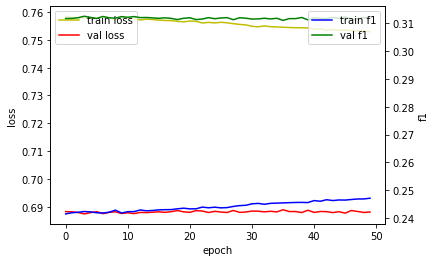

In [0]:
from matplotlib import pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history["f1"], 'b', label='train f1')
acc_ax.plot(history.history["val_f1"], 'g', label='val f1')
acc_ax.set_ylabel('f1')
acc_ax.legend(loc='upper right')



plt.show()

# 정규화

In [0]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_val = (X_val - X_val.min()) / (X_val.max() - X_val.min())
test = (test - test.min()) / (test.max() - test.min())

In [0]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred)

0.16787838730998017

In [0]:
import tensorflow as tf
import keras.backend.tensorflow_backend as K


def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [0]:
from tensorflow.keras import layers
import tensorflow as tf
from keras.callbacks import EarlyStopping


model_2= tf.keras.Sequential()
model_2.add(layers.Dense(64, activation="relu"))
model_2.add(layers.Dense(32, activation="relu"))
model_2.add(layers.Dense(1, activation="sigmoid"))

early_stopping = EarlyStopping(monitor='val_loss', patience = 10, mode='min')

model_2.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=f1_loss,
              metrics=["accuracy", f1],
              callbacks=[early_stopping])

In [0]:
history = model_2.fit(X_train.values, y_train.values, 100, 50, validation_data=(X_val.values, y_val.values))

Train on 59199 samples, validate on 6898 samples
Epoch 1/50
59199/59199 [==============================] - 3s 50us/sample - loss: 0.7974 - acc: 0.1914 - f1: 0.2102 - val_loss: 0.7361 - val_acc: 0.4121 - val_f1: 0.2425
Epoch 2/50
59199/59199 [==============================] - 3s 46us/sample - loss: 0.7962 - acc: 0.1682 - f1: 0.2160 - val_loss: 0.7351 - val_acc: 0.3611 - val_f1: 0.2565
Epoch 3/50
59199/59199 [==============================] - 3s 47us/sample - loss: 0.7949 - acc: 0.1536 - f1: 0.2204 - val_loss: 0.7350 - val_acc: 0.3089 - val_f1: 0.2617
Epoch 4/50
59199/59199 [==============================] - 3s 47us/sample - loss: 0.7936 - acc: 0.1449 - f1: 0.2234 - val_loss: 0.7325 - val_acc: 0.2676 - val_f1: 0.2723
Epoch 5/50
59199/59199 [==============================] - 3s 47us/sample - loss: 0.7926 - acc: 0.1394 - f1: 0.2246 - val_loss: 0.7320 - val_acc: 0.2372 - val_f1: 0.2795
Epoch 6/50
59199/59199 [==============================] - 3s 46us/sample - loss: 0.7916 - acc: 0.1362 - f1

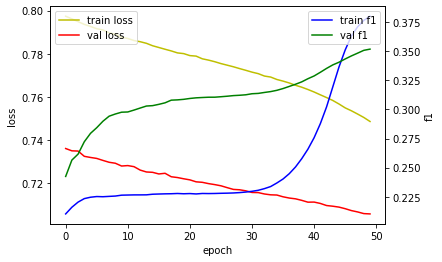

In [0]:
from matplotlib import pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history["f1"], 'b', label='train f1')
acc_ax.plot(history.history["val_f1"], 'g', label='val f1')
acc_ax.set_ylabel('f1')
acc_ax.legend(loc='upper right')



plt.show()

# 결측치가 많은 feature 제거

In [0]:
lws = list(df_train.iloc[:, 15:29].columns)
lws

['lw_13101010',
 'lw_13101110',
 'lw_13101210',
 'lw_13101211',
 'lw_13101310',
 'lw_13101410',
 'lw_13111010',
 'lw_13111110',
 'lw_13121010',
 'lw_13121011',
 'lw_13131010',
 'lw_13131110',
 'lw_13141010',
 'lw_13141011']

In [0]:
X_train = X_train.drop(lws, axis=1)
X_val = X_val.drop(lws, axis=1)
test = test.drop(lws, axis=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


model = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1_score(y_val, y_pred)

0.24017708909795243

In [0]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

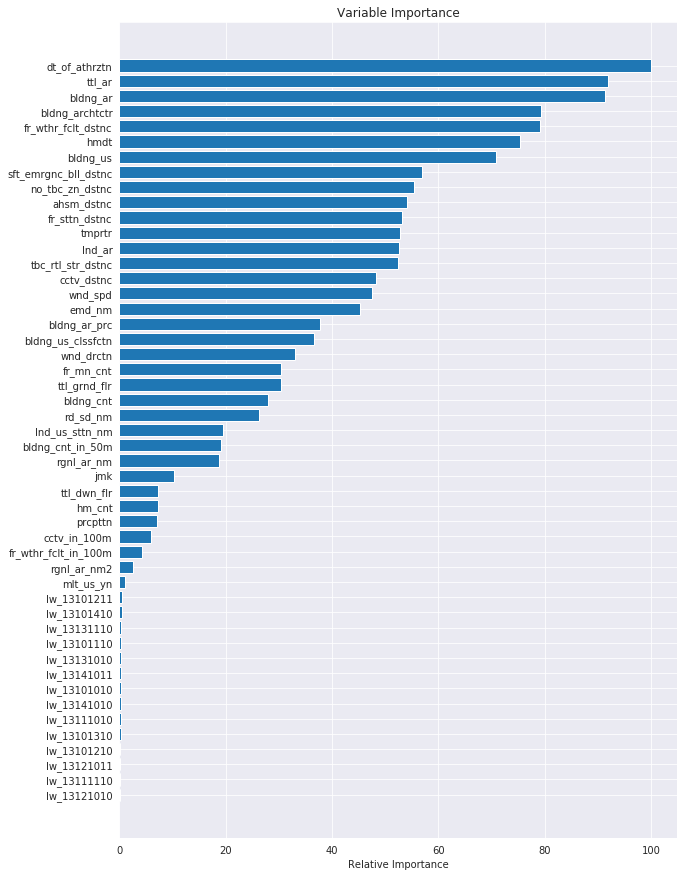

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


plot_feature_importance(model, X_train, (10, 15))

In [0]:
from tensorflow.keras import layers
import tensorflow as tf
from keras.callbacks import EarlyStopping


model_2= tf.keras.Sequential()
model_2.add(layers.Dense(64, activation="relu"))
model_2.add(layers.Dense(32, activation="relu"))
model_2.add(layers.Dense(1, activation="sigmoid"))

early_stopping = EarlyStopping(monitor='val_loss', patience = 10, mode='min')

model_2.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=f1_loss,
              metrics=["accuracy", f1],
              callbacks=[early_stopping])

In [0]:
history = model_2.fit(X_train.values, y_train.values, 100, 50, validation_data=(X_val.values, y_val.values))

Train on 59199 samples, validate on 6898 samples
Epoch 1/50
59199/59199 [==============================] - 3s 51us/sample - loss: 0.8023 - acc: 0.6042 - f1: 0.0895 - val_loss: 0.7440 - val_acc: 0.7950 - val_f1: 0.0380
Epoch 2/50
59199/59199 [==============================] - 3s 48us/sample - loss: 0.8003 - acc: 0.5502 - f1: 0.1308 - val_loss: 0.7417 - val_acc: 0.7795 - val_f1: 0.0593
Epoch 3/50
59199/59199 [==============================] - 3s 50us/sample - loss: 0.7985 - acc: 0.4962 - f1: 0.1711 - val_loss: 0.7399 - val_acc: 0.7572 - val_f1: 0.0972
Epoch 4/50
59199/59199 [==============================] - 3s 50us/sample - loss: 0.7969 - acc: 0.4497 - f1: 0.2049 - val_loss: 0.7391 - val_acc: 0.7314 - val_f1: 0.1347
Epoch 5/50
59199/59199 [==============================] - 3s 50us/sample - loss: 0.7947 - acc: 0.4075 - f1: 0.2307 - val_loss: 0.7375 - val_acc: 0.7021 - val_f1: 0.1687
Epoch 6/50
59199/59199 [==============================] - 3s 50us/sample - loss: 0.7936 - acc: 0.3736 - f1

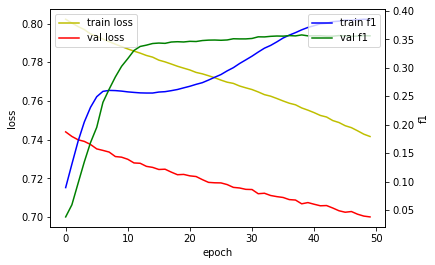

In [0]:
from matplotlib import pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history["f1"], 'b', label='train f1')
acc_ax.plot(history.history["val_f1"], 'g', label='val f1')
acc_ax.set_ylabel('f1')
acc_ax.legend(loc='upper right')



plt.show()